# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 26.03.2021

In [1]:
import tensorflow as tf
import numpy as np
import os
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt
import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Load images

In [2]:
path = "images/subset/test/"

In [3]:
IMG_SIZE = 224

In [4]:
NUM_CLASSES = 3

In [5]:
def load_images(path, num_of_classes) :
    folders = os.listdir(path)
    max_classes = len(folders)
    
    dog_dict = {}
    for f in folders :
        dog_dict[f.split('-')[0]] = f.split('-')[1]
    
    image_files = []
    labels = []
    
    for num,f in enumerate(folders):
        images = os.listdir(path + f)
        if num == num_of_classes or max_classes == num: break;
        for i in images:
            image_files.append(resize(io.imread(path +f +"/" + i), (IMG_SIZE, IMG_SIZE, 3)))
            labels.append(dog_dict[f.split('-')[0]])
    
    return image_files, labels

In [6]:
image_files, labels = load_images(path, NUM_CLASSES)

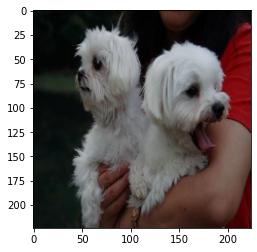

In [7]:
plt.imshow(image_files[0])

Load MobileNetV3 model

include_top = True (1000 classes)

include_top = False (without classifier) -> pooling ='avg' (to 2D array)

In [8]:
m = models.MobileNetV3((224,224), 3)

In [9]:
model = m.build_mobileNetV3_1a()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
reshape_9 (Reshape)          (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 3)           3075      
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 1,533,043
Trainable params: 3,075
Non-trainable params: 1,529,968
__________________________________________

In [10]:
model

In [11]:
model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3), alpha=1.0, minimalistic=False, include_top=True,
    weights='imagenet', input_tensor=None, pooling=None, dropout_rate=0.2, classifier_activation='softmax'
)

In [18]:
model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling_3[0][0]                
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

Prepare input data to fit model

In [32]:
X = np.stack(image_files)

In [33]:
X = tf.keras.applications.mobilenet_v3.preprocess_input(X, data_format=None)

In [34]:
prediction = model(X)

In [35]:
prediction.shape

TensorShape([143, 1000])